# Importing libraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from urllib.request import urlopen

In [4]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet, HoverTool

In [5]:
output_notebook()

Loading BokehJS ...

# Loading the data

In [6]:
h0 = pd.read_stata("H0_cpy_all.dta")

In [7]:
# comnapes = urlopen("http://unstats.un.org/unsd/tradekb/Attachment439.aspx?AttachmentType=1")

comnames = pd.read_excel("UN Comtrade Commodity Classifications.xlsx")

## Attributes

Selecting columns to explore:

In [8]:
h0 = h0.loc[:,['year',
               'exporter',
               'commoditycode',
               'export_value',
               'population',
               'rca',
               'mcp',
               'eci',
               'pci',
               'oppgain',
               'distance',
               'import_value']]

The attributes of the dataset and its data types:

In [9]:
h0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6181542 entries, 0 to 6181541
Data columns (total 12 columns):
year             int16
exporter         object
commoditycode    object
export_value     float32
population       float32
rca              float32
mcp              int8
eci              float32
pci              float32
oppgain          float32
distance         float32
import_value     float64
dtypes: float32(7), float64(1), int16(1), int8(1), object(2)
memory usage: 371.4+ MB


In [10]:
h0.describe()

,year,export_value,population,rca,mcp,eci,pci,oppgain,distance,import_value
count,6.181542e+06,6.181542e+06,6.181542e+06,6.181542e+06,6.181542e+06,6.181542e+06,6.181542e+06,6.181542e+06,6.181542e+06,6.181542e+06
mean,2.005684e+03,3.868108e+07,2.866923e+07,2.128131e+00,1.070479e-01,-1.888869e-06,9.767827e-01,4.326566e-01,9.107793e-01,3.880376e+07
std,6.302178e+00,8.094731e+08,1.179689e+08,4.633954e+02,3.091741e-01,9.968324e-01,1.957165e+00,5.355933e-01,1.113930e-01,7.738980e+08
min,1.995000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.168124e+00,-5.713369e+00,-1.127975e+00,0.000000e+00,0.000000e+00
25%,2.000000e+03,0.000000e+00,2.842170e+05,0.000000e+00,0.000000e+00,-7.514231e-01,-4.648689e-01,0.000000e+00,8.404849e-01,1.986000e+03
50%,2.006000e+03,1.546000e+03,4.628400e+06,2.469272e-03,0.000000e+00,2.020429e-02,1.101224e+00,3.929624e-01,9.314370e-01,1.694730e+05
75%,2.011000e+03,4.058420e+05,1.727914e+07,1.755035e-01,0.000000e+00,7.239327e-01,2.465013e+00,8.403433e-01,9.688715e-01,3.171623e+06
max,2.016000e+03,3.496526e+11,1.371220e+09,7.623724e+05,1.000000e+00,2.935766e+00,7.687447e+00,2.116711e+00,1.000000e+00,3.513117e+11


The data contains more than 6M rows.

Explanation for some of the data created by the Atlas researchers:
- Distance ('distance'): "The extent of a location's existing capabilities to make the product" based on the products distance to current exports as measured by co-export probabilities.
- Economic complexity index ('eci'): Country rank base on its export basket's diversification and complexity.
- Opportunity gain ('oppgai'): How much a location could benefit by deveoping a particular product.
- Product complexity index ('pci'): "Ranks the diversity and sophistication of production know-how required to produce a product" based on other number of countries producing that product and their economic complexity.
- Revealed comparative advantage ('rca'): Whether a country is an 'effective' exporter of a product (i.e. exports more than its 'fair share'). The bigger the value, the more important exporter the country is.
- Country-Product connection ('mcp'): Marks whether the particular country export the specific product with an `rca` greater than 1. This also allows us to measure country diversity and product ubiquity.

# Example rows

A row stands for an exporter country-commodity-year summary data.

In [11]:
h0.sample(10)

,year,exporter,commoditycode,export_value,population,rca,mcp,eci,pci,oppgain,distance,import_value
5058679,2013,BLM,0204,0.0,0.0,0.000000,0,0.986751,-1.657995,-0.299773,0.947853,22047.0
3228153,2006,PRT,2621,537229.0,10522288.0,0.462437,0,0.402117,1.139283,0.432406,0.704418,5459388.0
2980155,2005,TGO,6104,271865.0,5683268.0,0.442437,0,-0.724041,-2.705989,-0.505790,0.812786,3166813.0
5638581,2015,BIH,3306,88490.0,3535961.0,0.053838,0,0.275608,1.413033,0.545064,0.796049,9710372.0
1746289,2001,LBY,8707,7187.0,5440566.0,0.001175,0,-0.960134,3.186309,1.202670,0.992211,45971.0
5686091,2015,DZA,7009,89626.0,39871528.0,0.007059,0,-1.353205,2.374777,0.702945,0.994101,13682280.0
2935278,2005,PHL,4814,211976.0,86274240.0,0.038820,0,-0.218878,2.664545,1.094408,0.918747,3359397.0
3737680,2008,LBN,5909,1633.0,4111047.0,0.021082,0,0.459603,2.891539,0.957056,0.777893,185364.0
1613294,2001,ASM,8713,0.0,58175.0,0.000000,0,1.383169,3.260197,1.124999,0.931897,0.0
3435414,2007,JAM,1105,10297.0,2775467.0,0.112809,0,-0.593963,0.863172,0.654461,0.952011,21775.0


In [12]:
h0[(h0.commoditycode == '0409') & (h0.exporter == 'FIN')] # The annual summary data for Finland and 'natural honey'

,year,exporter,commoditycode,export_value,population,rca,mcp,eci,pci,oppgain,distance,import_value
79583,1995,FIN,0409,175124.0,5107790.0,0.052195,0,2.248170,-0.864998,-0.463275,0.819706,1551880.0
345585,1996,FIN,0409,141621.0,5124573.0,0.033379,0,2.330003,-1.000540,-0.466982,0.818454,1377644.0
610344,1997,FIN,0409,27852.0,5139835.0,0.007341,0,2.041037,-0.922908,-0.524194,0.807045,1661241.0
872617,1998,FIN,0409,28995.0,5153498.0,0.007679,0,2.236066,-1.020411,-0.530623,0.814752,2100349.0
1133647,1999,FIN,0409,11324.0,5165474.0,0.003380,0,2.233593,-1.154626,-0.487669,0.829371,2033317.0
1400892,2000,FIN,0409,16580.0,5176209.0,0.005058,0,2.168545,-1.147362,-0.487177,0.827328,1962472.0
1684296,2001,FIN,0409,7285.0,5188008.0,0.002142,0,2.060467,-0.934955,-0.414810,0.814347,1484333.0
1967700,2002,FIN,0409,40274.0,5200598.0,0.007588,0,2.132359,-0.951882,-0.533304,0.824454,2171525.0
2251104,2003,FIN,0409,4193.0,5213014.0,0.000598,0,2.236961,-0.948723,-0.560999,0.825958,3404777.0
2534508,2004,FIN,0409,35397.0,5228172.0,0.005789,0,2.197879,-0.892554,-0.527219,0.830410,3634920.0


# Missing values

This is a cleaned dataset and, therefore, there are no missing values.

In [13]:
h0.isna().describe()

,year,exporter,commoditycode,export_value,population,rca,mcp,eci,pci,oppgain,distance,import_value
count,6181542,6181542,6181542,6181542,6181542,6181542,6181542,6181542,6181542,6181542,6181542,6181542
unique,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False
freq,6181542,6181542,6181542,6181542,6181542,6181542,6181542,6181542,6181542,6181542,6181542,6181542


# Attribute distributions

Examining the distributions of the variables:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd442b354a8>,
      dtype=object)

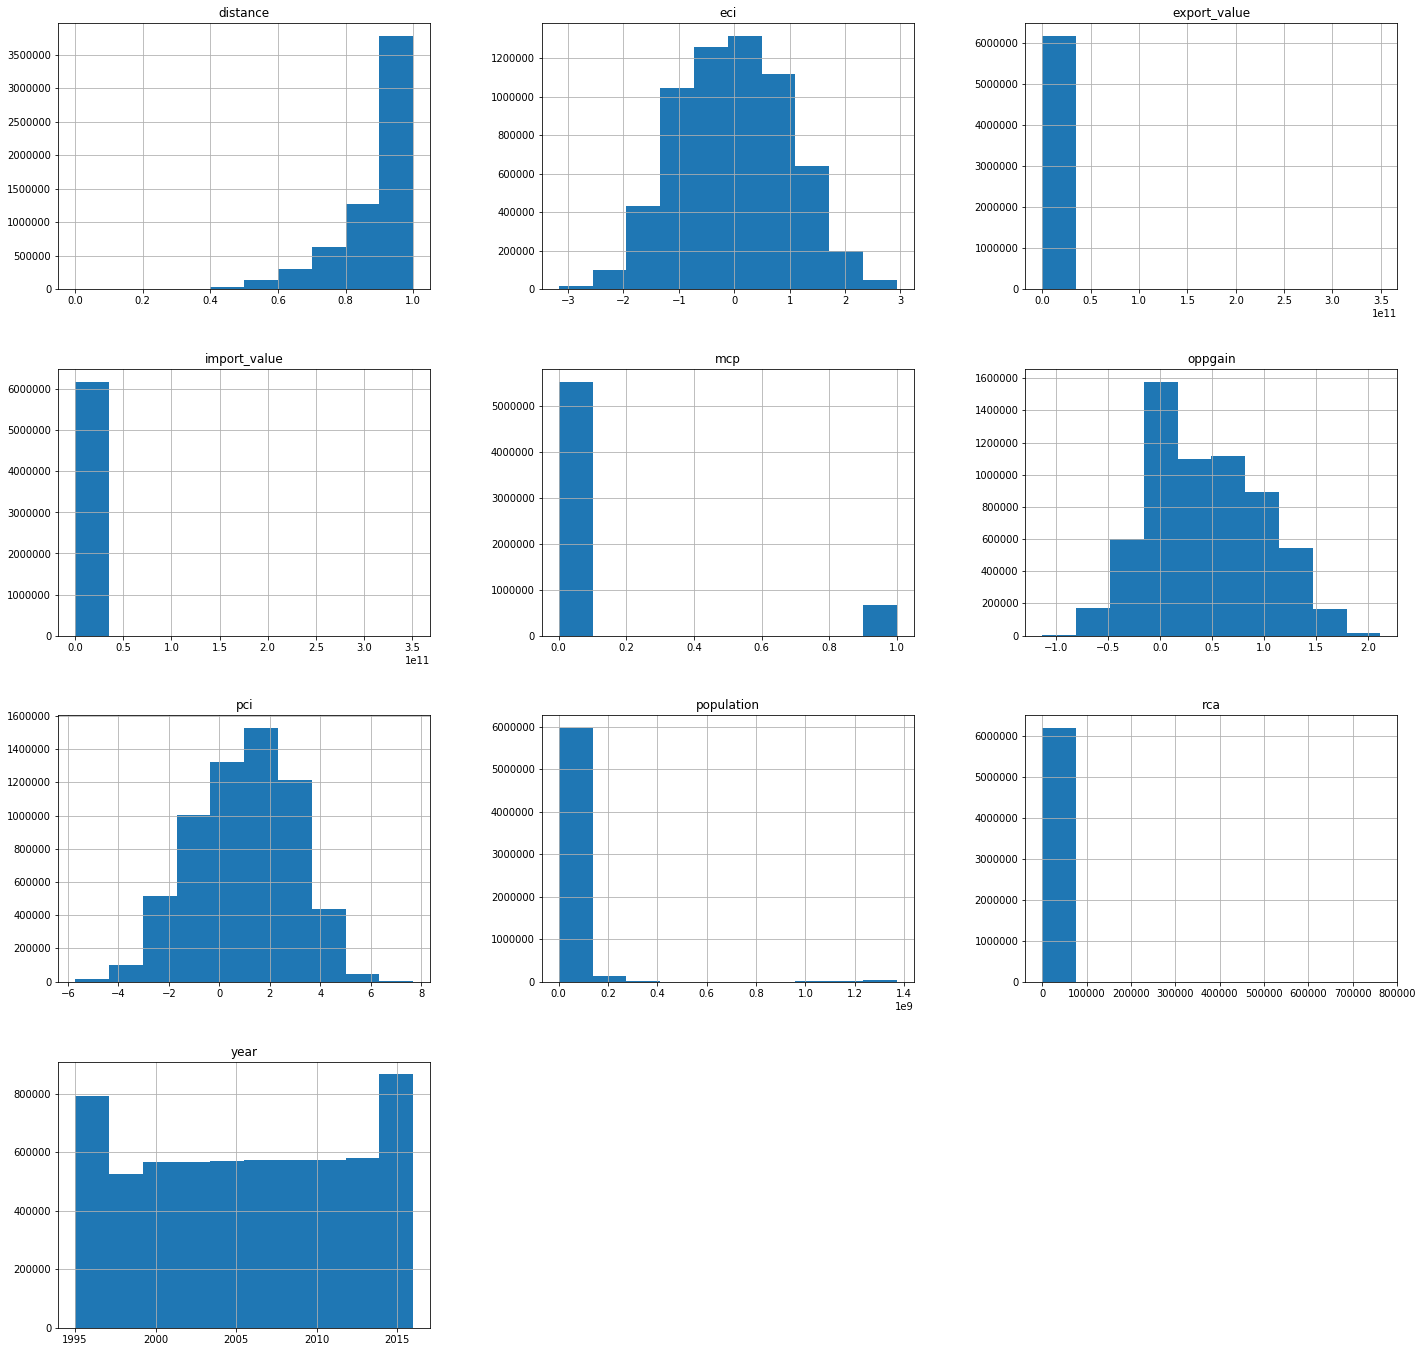

In [14]:
h0.hist(figsize=(24, 24))

Because this is a summary dataset which also tries to be consistent, a number of  attributes contains lots of zero values (e.g. import/export values, rce and mcp). These rows, nevertheless, give information about the country's distance and possible opportunity gain in relation that particular products and therefore we do not drop them.

In [15]:
h0[(h0.export_value == 0) & (h0.import_value == 0)]

,year,exporter,commoditycode,export_value,population,rca,mcp,eci,pci,oppgain,distance,import_value
1,1995,ABW,0102,0.0,80324.0,0.0,0,-0.219401,1.310403,0.533991,0.987476,0.0
2,1995,ABW,0103,0.0,80324.0,0.0,0,-0.219401,1.574714,0.411058,0.992502,0.0
3,1995,ABW,0104,0.0,80324.0,0.0,0,-0.219401,-0.187467,0.173810,0.988796,0.0
10,1995,ABW,0205,0.0,80324.0,0.0,0,-0.219401,1.058983,0.378973,0.987044,0.0
32,1995,ABW,0410,0.0,80324.0,0.0,0,-0.219401,-1.286610,-0.379686,0.991840,0.0
33,1995,ABW,0501,0.0,80324.0,0.0,0,-0.219401,-0.693909,-0.016578,0.991208,0.0
34,1995,ABW,0502,0.0,80324.0,0.0,0,-0.219401,-0.479478,0.118833,0.993193,0.0
35,1995,ABW,0503,0.0,80324.0,0.0,0,-0.219401,-0.354880,0.150833,0.992543,0.0
38,1995,ABW,0506,0.0,80324.0,0.0,0,-0.219401,-1.986722,-0.483823,0.989773,0.0
39,1995,ABW,0507,0.0,80324.0,0.0,0,-0.219401,-2.529573,-0.573510,0.987096,0.0


# First plot

## Getting the data

In [16]:
comtoexp = h0[(h0.year == 2016)].drop(columns=['year', 'population']).copy()

In [17]:
query = comtoexp[(comtoexp.exporter == 'IDN') & (comtoexp.mcp == 0)]
query.sort_values(by='distance').head()

,exporter,commoditycode,export_value,rca,mcp,eci,pci,oppgain,distance,import_value
6015309,IDN,0714,13483019.0,0.491027,0,-0.306436,-3.686064,-0.262815,0.652393,2680025.0
6015857,IDN,5303,39514.0,0.014981,0,-0.306436,-4.248095,-0.200430,0.665689,1065658.0
6015858,IDN,5304,0.0,0.000000,0,-0.306436,-3.626167,-0.115842,0.675000,0.0
6015864,IDN,5310,140443.0,0.070955,0,-0.306436,-3.800158,-0.182509,0.677161,705712.0
6015312,IDN,0803,9774218.0,0.067245,0,-0.306436,-3.399886,-0.170962,0.686601,188689.0


In [18]:
comnames.head()

,Classification,Code,Description,Code Parent,Level,isLeaf
0,BE,1,Food and beverages,TOTAL,1,0
1,BE,11,"Food and beverages, primary",1,2,0
2,BE,111,"Food and beverages, primary, mainly for industry",11,3,1
3,BE,112,"Food and beverages, primary, mainly for househ...",11,3,1
4,BE,12,"Food and beverages, processed",1,2,0


In [19]:
comnames = comnames[(comnames.Classification == 'H5')]

In [20]:
query = pd.merge(comnames[comnames.isLeaf ==  0].loc[:,['Code', 'Description']],
                query.loc[:,['commoditycode',
                             'mcp',
                             'distance',
                             'pci',
                             'oppgain']], 
                left_on='Code',
                right_on='commoditycode').drop(columns=['Code', 'commoditycode'])

In [21]:
query = query.sort_values(by='distance').head(30)
query

,Description,mcp,distance,pci,oppgain
48,"Manioc, arrowroot, salep, Jerusalem artichokes...",0,0.652393,-3.686064,-0.262815
457,"Jute and other textile bast fibres (not flax, ...",0,0.665689,-4.248095,-0.200430
462,"Woven fabrics of jute, other textile bast fibr...",0,0.677161,-3.800158,-0.182509
49,"Bananas, including plantains; fresh or dried",0,0.686601,-3.399886,-0.170962
505,"Underpants, briefs, nightshirts, pyjamas, bath...",0,0.695909,-1.540036,-0.018677
186,Petroleum oils and oils obtained from bitumino...,0,0.696705,-3.855992,-0.172183
522,"Hats and other headgear; knitted or crocheted,...",0,0.701737,-2.557624,0.037690
50,"Dates, figs, pineapples, avocados, guavas, man...",0,0.706207,-2.575540,-0.234240
178,Ores and concentrates; n.e.c. in heading no. 2601,0,0.708489,-3.100494,-0.213986
106,Cane or beet sugar and chemically pure sucrose...,0,0.712296,-2.123256,-0.174438


## Rendering the plot

In [78]:
p = figure(plot_width = 600,
           plot_height = 600)
           #tools=['pan', 'zoom_out', 'zoom_in', 'reset']) # 'hover', 

In [79]:
source = ColumnDataSource(data = dict(names = list(query.Description),
                                      opg=query.oppgain,                                      
                                      pci=query.pci, 
                                      dist=query.distance))

In [80]:
p.scatter(x = 'pci',
          y = 'opg',
          size = 15,
          color = 'indigo',
          alpha = 0.6,
          source = source)

GlyphRenderer(id='26acb488-2009-45b6-b73a-d7c3b4fbbb01', ...)

## Plot 1
The graph can help users to identify opportunities for production within a country.

It shows the least 30 least 'distant' but yet not produced prodcuts in a country (in this case, Indonesia). That is, starting to produce them would be relatively easy (in relation to the whole product universe), but nonetheless the country is not an 'effective' exporter of them.

Axes:
* X: 'Product complexity index': An index showing the relative complexity of that particular product as based on the diversity of countries producing it and the ubiquity of countries these countries make. That is, products with high PCI are typically produced by only a few countries with a wide procuction line.
* Y: 'Opportunity gain': The degree with which new opporunities emerge to more complex countries when producing that particular product.

Accordingly, the graph can help users to see those product types which are easy to produce, not produced within the country but can lead to novel valuable skills and know-how.

In [81]:
show(p)